# Consumer Complaint Classification/NLP

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
pwd

'C:\\Users\\Prabhat Singh'

In [3]:
df = pd.read_csv("C:\\Users\\Prabhat Singh\Desktop\dataset\kaggle5\Consumer_Complaints.csv")

In [4]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer Complaint,Company Public Response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date Sent to Company,Company Response to Consumer,Timely response?,Consumer disputed?,Complaint ID
0,3/12/14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/14,Closed with explanation,Yes,No,759217
1,10/1/16,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/5/16,Closed with explanation,Yes,No,2141773
2,10/17/16,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/16,Closed with explanation,Yes,No,2163100
3,6/8/14,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,6/10/14,Closed with explanation,Yes,Yes,885638
4,9/13/14,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,9/13/14,Closed with explanation,Yes,Yes,1027760


In [5]:
print(f"Total numbers of rows: {df.shape[0]} \nTotal number of rows: {df.shape[1]}")

Total numbers of rows: 9999 
Total number of rows: 18


In [6]:
col = ["Product", "Consumer Complaint"]
df = df[col]
df = df[pd.notnull(df["Consumer Complaint"])]

In [7]:
# after removing all the null value.
df.head(10)

,Product,Consumer Complaint
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
7,Credit reporting,An account on my credit report has a mistaken ...
12,Debt collection,This company refuses to provide me verificatio...
16,Debt collection,This complaint is in regards to Square Two Fin...
25,Mortgage,Started the refinance of home mortgage process...
26,Mortgage,"In XXXX, I and my ex-husband applied for a ref..."
28,Credit reporting,I have disputed several accounts on my credit ...
29,Mortgage,Mortgage was transferred to Nationstar as of X...
36,Credit card,"Was a happy XXXX card member for years, in lat..."


In [8]:
#unique value in product
df["Product"].unique()

array(['Credit reporting', 'Consumer Loan', 'Debt collection', 'Mortgage',
       'Credit card', 'Other financial service',
       'Bank account or service', 'Student loan', 'Money transfers',
       'Payday loan', 'Prepaid card',
       'Money transfer, virtual currency, or money service',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Checking or savings account', 'Vehicle loan or lease',
       'Credit card or prepaid card'], dtype=object)

In [9]:
df.columns=["Product","Consumer_Complaint"]
df["catagory_Id"] = df["Product"].factorize()[0]

In [10]:
cat_id_df = df[["Product","catagory_Id"]].drop_duplicates().sort_values("catagory_Id")

In [11]:
cat_to_id = dict(cat_id_df.values)

In [12]:
id_to_cat = dict(cat_id_df[["catagory_Id","Product"]].values) 

In [13]:
df.head()

,Product,Consumer_Complaint,catagory_Id
1,Credit reporting,I have outdated information on my credit repor...,0
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...,1
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2


In [14]:
import matplotlib.pyplot as plt

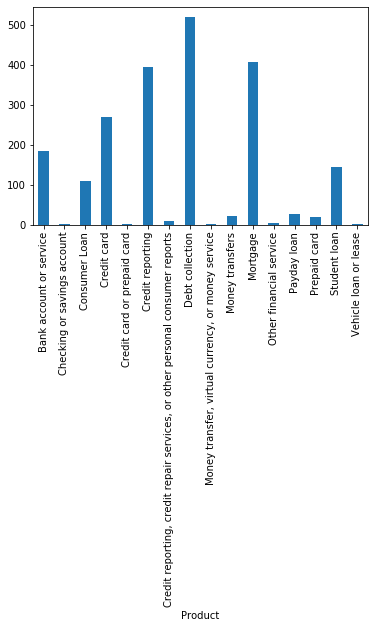

In [15]:
df.groupby("Product").Consumer_Complaint.count().plot.bar(ylim=0)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf = TfidfVectorizer(sublinear_tf=True,
                        min_df = 5, #minimum numbers of documents a word must be present in to be kept
                        norm= 'l2', #ensure all our feature vectors have a euclidian norm of 1
                        ngram_range= (1,2), #to indicate that we want to consider both unigrams and bigrams.
                        stop_words ='english')
                        

In [32]:
features = tfidf.fit_transform(df.Consumer_Complaint).toarray()

In [34]:
labels = df.catagory_Id
features.shape

(2114, 6081)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df["Consumer_Complaint"],df["Product"], random_state=0)

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

In [45]:
X_train_counts = count_vect.fit_transform(X_train)

In [50]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [54]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train_tfidf, y_train)

In [61]:
print(clf.predict(count_vect.transform(['Started the refinance of home mortgage process...'])))

['Mortgage']


In [62]:
y_pred = clf.predict(count_vect.transform(X_test))

In [63]:
y_pred

array(['Bank account or service', 'Credit card', 'Debt collection',
       'Debt collection', 'Mortgage', 'Credit reporting', 'Student loan',
       'Credit card', 'Debt collection', 'Bank account or service',
       'Mortgage', 'Bank account or service', 'Mortgage',
       'Debt collection', 'Debt collection', 'Mortgage', 'Mortgage',
       'Credit reporting', 'Mortgage', 'Mortgage', 'Credit reporting',
       'Mortgage', 'Credit reporting', 'Credit reporting',
       'Credit reporting', 'Credit reporting', 'Debt collection',
       'Credit reporting', 'Bank account or service', 'Credit card',
       'Credit reporting', 'Credit reporting', 'Bank account or service',
       'Bank account or service', 'Credit card',
       'Bank account or service', 'Credit card', 'Debt collection',
       'Credit card', 'Credit card', 'Bank account or service',
       'Student loan', 'Mortgage', 'Bank account or service',
       'Credit card', 'Credit card', 'Mortgage', 'Credit reporting',
       'Cred

In [79]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred, labels= df.Product, target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                            Credit reporting       0.70      0.87      0.77        91
                                                               Consumer Loan       0.36      0.43      0.39        21
                                                             Debt collection       0.70      0.87      0.77        91
                                                                    Mortgage       0.86      0.69      0.76       124
                                                                 Credit card       0.86      0.69      0.76       124
                                                     Other financial service       0.86      0.89      0.88       113
                                                     Bank account or service       0.86      0.89      0.88       113
                                                       

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1870: UserWarning: labels size, 2114, does not match size of target_names, 16
  .format(len(labels), len(target_names))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
